---

# Keras Sequential Neural Network model to predict the probability of a phishing URL

---

### this notebook is of the final Keras model version that was decided on for this project
### included are two different ways to build the same Keras model, along with predictions and cross validation results

---

In [ ]:
# if you haven't used tensorflow before, uncomment below to install:

# pip install tensorflow

In [1]:
#load packages and libraries

import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import *
from keras.utils.np_utils import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns


print("Done Loading")


C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jorda\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Done Loading


Using TensorFlow backend.


## load data

In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


---

# unit testing to remove negative values (there cannot be a negative url length, etc.)

---

In [3]:
# Noticed a discrepancy in the data, some values are recorded as -1 even though it makes not practical sense, i.e. you can't have a negative quantity of a character
# This changes all -1 to 0
full_df.dtypes == 'int64'

def remove_negatives(full_df):
    full_df[full_df == -1] = 0
remove_negatives(full_df)

In [4]:
# unit test 
is_it_working = []
def data_cleaning_unit_test(column):
    did_it_work =  {'Yes':0 , 'No':0}
    for i in column:
        if i >= 0:
            did_it_work['Yes'] += 1
        elif i <0:
            did_it_work['No'] += 1
    if did_it_work['No'] > 0:
        print(column.name,'=', 'Not working')
    else:
        print(column.name,'=', 'It worked!')

In [5]:
for col in full_df.columns.tolist():
    data_cleaning_unit_test(full_df[col])

qty_dot_url = It worked!
qty_hyphen_url = It worked!
qty_underline_url = It worked!
qty_slash_url = It worked!
qty_questionmark_url = It worked!
qty_equal_url = It worked!
qty_at_url = It worked!
qty_and_url = It worked!
qty_exclamation_url = It worked!
qty_space_url = It worked!
qty_tilde_url = It worked!
qty_comma_url = It worked!
qty_plus_url = It worked!
qty_asterisk_url = It worked!
qty_hashtag_url = It worked!
qty_dollar_url = It worked!
qty_percent_url = It worked!
qty_tld_url = It worked!
length_url = It worked!
qty_dot_domain = It worked!
qty_hyphen_domain = It worked!
qty_underline_domain = It worked!
qty_slash_domain = It worked!
qty_questionmark_domain = It worked!
qty_equal_domain = It worked!
qty_at_domain = It worked!
qty_and_domain = It worked!
qty_exclamation_domain = It worked!
qty_space_domain = It worked!
qty_tilde_domain = It worked!
qty_comma_domain = It worked!
qty_plus_domain = It worked!
qty_asterisk_domain = It worked!
qty_hashtag_domain = It worked!
qty_dolla

---

# Keras Sequential NN model on entire dataset

---

In [6]:
y = full_df.iloc[:,-1]

X = full_df.iloc[:,0:111]

X = tf.keras.utils.normalize(X, axis=-1, order=2)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=808)

train_X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
5676,0.000004,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000797,0.000004,0.000023,0.000008,0.011480,0.000004,0.000000,0.0,0.0,0.0
39002,0.000777,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.680199,0.001036,0.001036,0.000518,0.064003,0.000259,0.000259,0.0,0.0,0.0
1732,0.000092,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016112,0.000046,0.000092,0.000046,0.662860,0.000000,0.000000,0.0,0.0,0.0
39668,0.000122,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005926,0.000061,0.000122,0.000244,0.439823,0.000000,0.000061,0.0,0.0,0.0
82035,0.000054,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007212,0.000027,0.000107,0.000107,0.579014,0.000000,0.000000,0.0,0.0,0.0


In [7]:
tf.keras.backend.clear_session() #clear tensorflow backend to help with memory leakage

nn_mod_1 = keras.Sequential([
                          layers.InputLayer(input_shape=[111]),                   # first layer - input - number of columns in X
                          layers.Dense(units=64, activation='relu'),              # second layer - first dense layer - 64 output neurons w/ rectified linear unit activation
                          layers.Dropout(0.2),                                    # third layer - first dropout layer - drop 20% of neurons
                          layers.Dense(units=64, activation='relu'),              # fourth layer - second dense layer - 64 output neurons w/ ReLU activation
                          layers.Dropout(0.2),                                    # fifth layer - second dropout layer - drop 20% of neurons 
                          layers.Dense(units=50, activation='relu'),              # sixth layer -  third dense layer - 50 output neurons w/ ReLU activation
                          layers.Dropout(0.20),                                   # seventh layer - third dropout layer - drop 20% of neurons
                          layers.Dense(units=32, activation='relu'),              # eighth layer - fourth dense layer - 32 output neurons w/ ReLU activation 
                          layers.Dropout(0.2),                                    # ninth layer - fourth dropout layer - drop 20% of neurons
                          layers.Dense(units=32, activation='relu'),              # tenth layer - fifth dense layer - 32 output neurons w/ ReLU activation
                          layers.Dropout(0.2),                                    # eleventh layer - fifth dropout layer - drop 20% of neurons
                          layers.Dense(units=16, activation='relu'),              # twelfth layer - sixth dense layer - 16 output neurons w/ ReLU activation
                          layers.Dropout(0.40),                                   # thirteenth layer - sixth dropout layer - drop 40% of neurons
                          layers.Dense(units=16, activation='relu'),              # fourteenth layer - seventh dense layer - 16 output neurons w/ ReLU activation
                          layers.Dropout(0.40),                                   # fifteenth layer - seventh dropout layer - drop 40% of neurons
                          layers.Dense(units=111, activation='relu'),             # sixteenth layer - eighth dense layer - 111 output neurons w/ ReLU activation
                          layers.Flatten(),                                       # seventeenth layer - flatten - adds column to X for predictions to fit
                          layers.Dense(units=1, activation='sigmoid')             # eighteenth layer - output layer - 1 output neuron w/ sigmoid activation (preds <> 0, 1)
])

nn_mod_1.compile(
    optimizer='adam', #best optimizer for noise, easy computation
    loss='binary_crossentropy', #crossentropy between preds and val_y; preds are between 0 & 1 so we use binary
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), #binary accuracy between preds and val_y with 0.5 threshold
             tf.keras.metrics.AUC(), # measuring AUC (obviously) through internal measures of TP, TN, FP, FN
             ]
)

# early stopping callback will monitor the validation data's binary accuracy for it's maximum value
# & 25 epochs after reaching the maximum value, the model will stop running and restore the best layer weights measured.
# I don't actually want this to run for anywhere near 500 epochs but this gives it the flexibility to learn as long as needed

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)

# this will output a table of the layers, each layer output shape, and the parameters measured by the model
nn_mod_1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7168      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
__________________________________________

### this fit method:
 - does not use the original validation split (25%) during model fitting to allow for more accurate evaluation and preditions later on
 - the 75% training split (train_X, train_y) is split 70/30 during model fitting and each epoch the 70/30 split is, well, shuffled 
 - the epochs are set to 500 (500 iterations) but the early stopping callback should keep the epochs significantly less than that
 - the batch_size is how many rows are fed into the model at a time
 - there are 8 workers to *hopefully* help it run faster, in addition to the early stopping callback being applied

In [8]:
history1 = nn_mod_1.fit(train_X, train_y, validation_split=0.30, shuffle=True, batch_size= 175, epochs=500, callbacks = [earlystopping], workers=8)

Train on 46539 samples, validate on 19946 samples
Epoch 1/500
46539/46539 [==============================] - 3s 65us/sample - loss: 0.5920 - binary_accuracy: 0.6562 - auc: 0.7048 - val_loss: 0.5604 - val_binary_accuracy: 0.7227 - val_auc: 0.7626
Epoch 2/500
46539/46539 [==============================] - 2s 38us/sample - loss: 0.5526 - binary_accuracy: 0.7129 - auc: 0.7529 - val_loss: 0.5767 - val_binary_accuracy: 0.7258 - val_auc: 0.7677
Epoch 3/500
46539/46539 [==============================] - 2s 41us/sample - loss: 0.5400 - binary_accuracy: 0.7198 - auc: 0.7615 - val_loss: 0.5612 - val_binary_accuracy: 0.7312 - val_auc: 0.7801
Epoch 4/500
46539/46539 [==============================] - 2s 46us/sample - loss: 0.5184 - binary_accuracy: 0.7337 - auc: 0.7855 - val_loss: 0.5531 - val_binary_accuracy: 0.7488 - val_auc: 0.8107
Epoch 5/500
46539/46539 [==============================] - 2s 48us/sample - loss: 0.4615 - binary_accuracy: 0.7797 - auc: 0.8449 - val_loss: 0.4814 - val_binary_accur

In [9]:
#turn model fit metric measures into a pandas dataframe

history_df1 = pd.DataFrame(history1.history)

history_df1.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.288718,0.880426,0.934722,0.314397,0.889321,0.949931
std,0.081481,0.051619,0.052444,0.090034,0.049732,0.047198
min,0.234046,0.656159,0.704803,0.222977,0.722701,0.762629
25%,0.246682,0.887815,0.943606,0.250806,0.894966,0.959140
50%,0.255353,0.900707,0.953500,0.284053,0.907676,0.964840
75%,0.283598,0.902995,0.956423,0.357818,0.917114,0.967601
max,0.592042,0.908313,0.960792,0.576703,0.921889,0.972292


## evaluating the model and getting the overall model metrics following model fitting

In [10]:
#tf.keras function to evaluate the model & record best metrics

train_acc = nn_mod_1.evaluate(train_X, train_y)  # evaluation w/ best measures of training data -- aka model fit
test_acc = nn_mod_1.evaluate(val_X, val_y)       # evaluation w/ best measures of validation/testing data -- the model hasn't seen this data before so super important!

22162/22162 [==============================] - 2s 74us/sample - loss: 0.2397 - binary_accuracy: 0.9210 - auc: 0.9678


In [11]:
# display validation/testing evaluation metrics in a different way

dict(zip(nn_mod_1.metrics_names, test_acc))

{'loss': 0.23967102434166437, 'binary_accuracy': 0.9209909, 'auc': 0.9677572}

### graphs of the training vs. validation metrics across model fitting

Minimum validation loss (binary_crossentropy): 0.22297702362066307


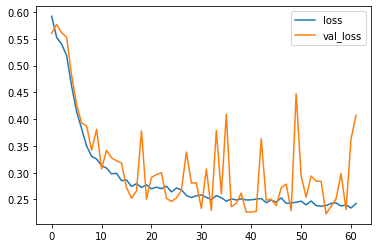

In [12]:
history_df1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df1['val_loss'].min()))

Maximum AUC: 0.972291886806488


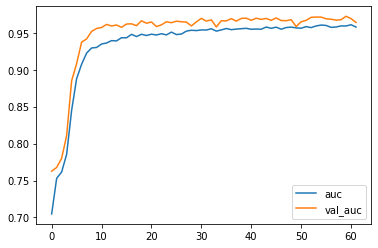

In [13]:
history_df1.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df1['val_auc'].max()))

Maximum validation binary accuracy: 0.9218891263008118


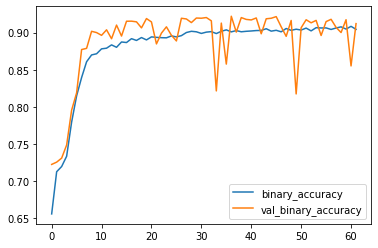

In [14]:
history_df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df1['val_binary_accuracy'].max()))

## making probablistic predictions

In [15]:
preds1 = nn_mod_1.predict(val_X) # this is tf.keras function & could be called on the entire dataset but it's not fair to ask the model to predict on data already seen
preds1

array([[0.9009093 ],
       [0.01844689],
       [0.42265916],
       ...,
       [0.2262679 ],
       [0.05991422],
       [0.9009093 ]], dtype=float32)

---
# NN in a more deployable format

## this is the model format to be used in the .py file for deployment

### this format also allows for cross-validation to validate the model's integrity/results
 - the cross-validation is the most time consuming portion of the notebook, fyi

---

In [20]:
tf.keras.backend.clear_session()

earlystopping = callbacks.EarlyStopping(monitor = 'val_acc', mode = 'max', #this needs to be changed to 'val_accuracy' if running in a colab notebook (for some reason jupyter is different)
                                         patience = 15, restore_best_weights = True)

# building the model as a callable function for easier use with the sklearn wrapper

def phish_nn():
  model = keras.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=[111]))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=50, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.20))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.40))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.40))
  model.add(tf.keras.layers.Dense(units=111, activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #had to slightly alter these parameters per the limitations on metric measuring in the sklearn wrapper
  model.fit(train_X, train_y, validation_split=0.30, batch_size= 175, epochs=50, callbacks = [earlystopping], workers=8) #lowered epochs b/c w/cv there will be more epochs than in the original model fitting
  model.predict(val_X) #give the model the ability to predict as above
  model.evaluate(val_X, val_y) #give the model the ability to evaluate like was done above
  return model



In [21]:
mod = KerasClassifier(build_fn=phish_nn,
                        epochs=10,
                        batch_size=175)

In [22]:
num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=True)

In [23]:
cv_results=cross_val_score(mod,
                           X, y,
                           cv=kfold
                           )

Train on 46539 samples, validate on 19946 samples
Epoch 1/50
46539/46539 [==============================] - 2s 43us/sample - loss: 0.5944 - acc: 0.6553 - val_loss: 0.5813 - val_acc: 0.7160
Epoch 2/50
46539/46539 [==============================] - 2s 36us/sample - loss: 0.5523 - acc: 0.7117 - val_loss: 0.5753 - val_acc: 0.7259
Epoch 3/50
46539/46539 [==============================] - 2s 41us/sample - loss: 0.5422 - acc: 0.7207 - val_loss: 0.5747 - val_acc: 0.7209
Epoch 4/50
46539/46539 [==============================] - 2s 44us/sample - loss: 0.5223 - acc: 0.7310 - val_loss: 0.4953 - val_acc: 0.7494
Epoch 5/50
46539/46539 [==============================] - 2s 42us/sample - loss: 0.4771 - acc: 0.7678 - val_loss: 0.4569 - val_acc: 0.7913
Epoch 6/50
46539/46539 [==============================] - 2s 42us/sample - loss: 0.4372 - acc: 0.8020 - val_loss: 0.4805 - val_acc: 0.7789
Epoch 7/50
46539/46539 [==============================] - 2s 47us/sample - loss: 0.4005 - acc: 0.8280 - val_loss: 0.

In [24]:
print('The average cross-validation accuracy is: ', round(cv_results.mean(), 4)*100, '%')

The average cross-validation accuracy is:  91.11 %


In [30]:
print('The standard deviation for the cross-validation accuracy measure is: ', round(cv_results.std(), 4), '%')

The standard deviation for the cross-validation accuracy measure is:  0.0127 %


In [26]:
print('The five cross-validation accuracy results are: \n', cv_results)

The five cross-validation accuracy results are: 
 [0.8868584  0.91054708 0.9162389  0.92154098 0.92018723]


In [27]:
# making predictions based on a five fold cross-validation
cv_preds = cross_val_predict(mod, X, y, cv=5)

Train on 46539 samples, validate on 19946 samples
Epoch 1/50
46539/46539 [==============================] - 3s 55us/sample - loss: 0.5911 - acc: 0.6554 - val_loss: 0.5523 - val_acc: 0.6592
Epoch 2/50
46539/46539 [==============================] - 2s 53us/sample - loss: 0.5507 - acc: 0.7119 - val_loss: 0.5629 - val_acc: 0.7271
Epoch 3/50
46539/46539 [==============================] - 2s 44us/sample - loss: 0.5380 - acc: 0.7231 - val_loss: 0.5376 - val_acc: 0.7348
Epoch 4/50
46539/46539 [==============================] - 2s 46us/sample - loss: 0.5163 - acc: 0.7359 - val_loss: 0.5094 - val_acc: 0.7639
Epoch 5/50
46539/46539 [==============================] - 2s 45us/sample - loss: 0.4706 - acc: 0.7731 - val_loss: 0.4552 - val_acc: 0.7900
Epoch 6/50
46539/46539 [==============================] - 2s 52us/sample - loss: 0.4275 - acc: 0.8075 - val_loss: 0.4188 - val_acc: 0.8494
Epoch 7/50
46539/46539 [==============================] - 2s 50us/sample - loss: 0.3935 - acc: 0.8313 - val_loss: 0.

In [28]:
cv_preds

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [29]:
#confusion matrix of the cross validation results & the actual values
cm = confusion_matrix(y, cv_preds)
print(cm)

[[52875  5125]
 [ 2776 27871]]


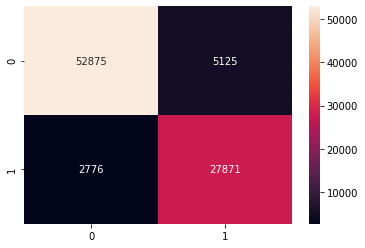

In [49]:
sns.heatmap(cm, annot=True, fmt='')

In [31]:
f1s = f1_score(y, cv_preds)

print('The F1 score for the model is: \n', f1s)

The F1 score for the model is: 
 0.8758543751865876


In [57]:
precis = precision_score(y, cv_preds, average='binary')
rec = recall_score(y, cv_preds, average='binary')
print('The precision-recall score is: {0:0.2f}'.format(precis))
print('The recall score is: %.3f' % rec)

The precision-recall score is: 0.84
The recall score is: 0.909
